<span style="color:DarkBlue;font-size:32px">Preisvorhersage von Gebrauchtwagen </span>

<span style="color:DarkBlue;font-size:18px">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SS2023)</span>

<span style="color:DarkBlue;font-size:18px"> Bearbeitet von M.Sc. Onur Yilmaz</span>

### **Inhaltsverzeichnis**

[Einleitung](#Einleitung)

[1. Datenaufbereitung](#Datenaufbereitung)

[1.1. Daten extrahieren](#Daten-extrahieren)

[1.2. Daten bereinigen](#Daten-bereinigen)

[1.3. Daten transformieren](#Daten-transformieren)

[2. Explorative Datenanalyse](#Explorative-Datenanalyse)

[2.1. Univariate Analyse](#Daten-extrahieren)

[2.2. Bivariate Analyse](#Daten-extrahieren)

[2.3. Multivariate Analyse](#Daten-extrahieren)

[2.4. Identifikation von Ausreißern](#Daten-extrahieren)

[2.5. Korrelationsanalyse](#Daten-extrahieren)

[3. Feature Engineering](#Feature-Engineering)

[4. Modell Auswahl und Training](#Modell-Auswahl-und-Training)

[4.1. XGBoost](#XGBoost)

[5. Modell Bewertung](#Modell-Bewertung)

[6. Streamlit](#Streamlit)

[Literaturverzeichnis](#Literaturverzeichnis)


### <a id="Einleitung"></a>**Einleitung**

In der vorliegenden semesterabschließenden Arbeit wird ein aufbereiteter Datensatz von 100.000 gebrauchten Autoanzeigen aus dem Vereinigten Königreich analysiert. Der Datensatz wurde von der Plattform Kaggle bezogen - **https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes**.

Das Hauptziel dieser Arbeit ist die Wahl und Implementierung eines geeigneten maschinellen Lernmodells zur Preisvorhersage von Gebrauchtwagen.

Die Arbeit gliedert sich in verschiedene Abschnitte, beginnend mit der Datenaufbereitung, gefolgt von der explorativen Datenanalyse und dem Feature Engineering. Anschließend wird das passende Modell ausgewählt und trainiert, bevor es bewertet wird. Zusätzlich wird die Implementierung in Streamlit durchgeführt, um eine interaktive Webanwendung zur Darstellung der Ergebnisse zu erstellen.

Der Datensatz ist in einzelne Dateien nach Autoherstellern unterteilt und enthält Informationen wie Preis, Getriebe, Kilometerstand, Kraftstoffart, Kfz-Steuer, Verbrauch in Meilen pro Gallone (mpg) und Motorgröße.

**Das gesamte Projekt kann aus dem folgenden Repository geklont werden: https://www.github.com/ONURYI**

### <a id="Datenaufbereitung"></a>**1. Datenaufbereitung**

#### <a id="Daten-extrahieren"></a>**1.1. Daten extrahieren**

Die Datenaufbereitung stellt im Prozess des maschinellen Lernens oft einen entscheidenden, aber zugleich zeitaufwendigen Schritt dar. Sie umfasst diverse Techniken zur Säuberung, Transformation und Organisation der Rohdaten, um sie in ein für die Analyse passendes Format zu überführen. Diese Etappe legt das solide Fundament für die Erstellung eines Modells, da sie die Qualität und Relevanz der Daten gewährleistet. Dies trägt maßgeblich zur Präzision und Leistungsfähigkeit des endgültigen Modells bei [2].

Im Kontext unseres Projektes verwenden wir folgende CSV-Dateien (CSV = Comma-Separated Values):

- audi.csv
- bmw.csv
- ford.csv
- hyundai.csv
- mercedes.csv
- skoda.csv
- toyota.csv
- vauxhall.csv (unbenannt in opel)
- vw.csv

Diese Dateien sind im Ordner **/data** gespeichert und werden nach dem Aufbereitungs- und Bereinigungsprozess im Ordner **/data (clean)** als einzige zusammengefasste CSV-Datei abgelegt.

Für diesen Abschnitt wird ausschließlich auf die weit verbreitete **Pandas-Bibliothek** zurückgegriffen, welche sich als leistungsfähiges Werkzeug zur Datenmanipulation und -analyse etabliert hat. Hierbei lesen wir die Daten aus und stellen die Daten als sog. **DataFrames** dar, da sie eine standardisierte, zweidimensionale Struktur bieten, die das Speichern, Manipulieren und Analysieren von tabellarischen Daten vereinfacht, wodurch die Datenanalyse und -verarbeitung insgesamt effizienter und übersichtlicher wird [3].

In [30]:
import pandas as pd

Wir lesen nun die ersten CSV-Files aus, uns erst einmal einen Überblick zu verschaffen:

In [31]:
df_audi =  pd.read_csv('../data/audi.csv')
df_ford  =  pd.read_csv('../data/ford.csv')

In [32]:
df_audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [33]:
df_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Der Befehl *df.shape* gibt uns Auskunft über die zugehörige Dimension unseres DataFrames. Die erste Zahl, gibt die Anzahl der Zeilen und die zweite Zahl, die Anzahl der Spalten (auch Variable oder Merkmale genannt) wieder.

In [34]:
print(df_audi.shape)
print(df_ford.shape)

(10668, 9)
(17965, 9)


Um schließlich einen umfassenden Datensatz zu erhalten, fassen wir diesen in einem DataFrame zusammen, wobei wir eine zusätzliche Spalte hinzugefügt haben, die als brand bezeichnet wird und die Marke des Modells enthält.

In [35]:
file_paths = [
    '../data/audi.csv',
    '../data/bmw.csv',
    '../data/ford.csv',
    '../data/hyundi.csv',
    '../data/mercedes.csv',
    '../data/skoda.csv',
    '../data/toyota.csv',
    '../data/opel.csv',
    '../data/vw.csv',
]

all_dataframes = []

# Durchlaufe alle Dateipfade und lade die CSV-Dateien
for file_path in file_paths:
    df = pd.read_csv(file_path)
    brand = file_path.split('/')[-1].split('.')[0]  # Extrahiere die Marke aus dem Dateinamen
    df['brand'] = brand  # Füge eine Spalte mit der Marke hinzu
    # Ändere die Reihenfolge der Spalten, um "brand" an den Anfang zu setzen
    df = df[['brand'] + [col for col in df.columns if col != 'brand']]
    all_dataframes.append(df)

df = pd.concat(all_dataframes, ignore_index=True)

In [36]:
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


In [37]:
df.shape

(99187, 11)

#### <a id="Daten-bereinigen"></a>**1.2. Daten bereinigen**

Um redundate Daten vorzubeugen müssen wir vorab unsere Daten auf Duplikate prüfen:

In [38]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

df = df.drop_duplicates()

df.shape

1475


(97712, 11)

Insgesamt hat sich der Datensatz somit um 1457 Zeilen reduziert. 

Als nächsten Schritt prüfen wir den Datensatz anschließend auf fehlende Werte:

In [39]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

tax        4774
tax(£)    92938
dtype: int64

Es gibt fehlende Werte in den Spalten tax, mpg, und tax(£). 

Gerade die Spalte tax(£) scheint in einem großen Teil des Datensatzes zu fehlen, weshalb wir die Spalte entfernen können, aufgrund fehlendem Informationsgehalt.


Die anderen Spalten könnten wir die fehlenden Werte mit geeigneten Methoden behandeln, wie z.B. durch das Ausfüllen mit dem Durchschnittswert oder Median.

In [40]:
df = df.drop(columns=['tax(£)'])
df['tax'].fillna(df['tax'].median(), inplace=True)
df['mpg'].fillna(df['mpg'].median(), inplace=True)

In [41]:
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Nun nachdem wir geprüft haben, dass auch die Daten keine fehlenden Werte (**missing values**) mehr enthalten, müssen wir nun schauen das unsere Daten insgesamt plausibel sind.

In [42]:
print(df['year'].min())
print(df['year'].max())

1970
2060


Diese problematischen Zeilen müssen wir nun einmal filtern.

In [43]:
df = df[(df['year'] != 1970) & (df['year'] != 2060)]

In [44]:
df.shape

(97709, 10)

In [45]:
unique_values_counts = df['transmission'].value_counts()

print("Einzelne eindeutige Werte und ihre Häufigkeit:")
print(unique_values_counts)

Einzelne eindeutige Werte und ihre Häufigkeit:
Manual       55501
Semi-Auto    22296
Automatic    19903
Other            9
Name: transmission, dtype: int64


In [46]:
unique_values_counts = df['fuelType'].value_counts()

print("Einzelne eindeutige Werte und ihre Häufigkeit:")
print(unique_values_counts)

Einzelne eindeutige Werte und ihre Häufigkeit:
Petrol      53980
Diesel      40418
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64


#### <a id="Daten-transformieren"></a>**1.3. Daten transformieren**

Da es sich bei dem vorliegenden Datensatz um einen UK-Datensatz handelt, waren die Spalten und Zeilen ursprünglich für den englischsprachigen Raum konzipiert. Um jedoch eine bessere Interpretierbarkeit unserer Daten im deutschsprachigen Kontext zu gewährleisten, haben wir die Daten entsprechend transformiert. 

**Es ist wichtig zu betonen, dass die Konvertierung von Einheiten und die Abweichung von den Rohdaten problematisch sein können!**

Hierbei wurde [4] hinzugezogen um noch einmal auf die Richtigkeit der Funktionen zu überprüfen und nachzujustieren.

In [47]:
# Funktion Umrechnung von (mpg) zu (l/100km)
def mpg_to_l_per_100km(mpg):
    return 235.215 / mpg

# Funktion Umrechnung Meilen zu km
def miles_to_km(miles):
    return miles * 1.60934

In [48]:
df.columns = [
    'Marke', 'Modell', 'Baujahr', 'Preis (£)', 'Getriebe', 'Kilometerstand', 'Kraftstoffart', 'Steuer (£)', 'Verbrauch (l/100km)', 'Motorgröße (l)']

df['Getriebe'] = df['Getriebe'].map({'Manual': 'Manuell', 
                                     'Automatic': 'Automatik', 
                                     'Semi-Auto': 'Halbautomatisch',
                                     'Other': 'Andere'})

df['Kraftstoffart'] = df['Kraftstoffart'].map({'Petrol': 'Benzin', 
                                               'Diesel': 'Diesel', 
                                               'Hybrid': 'Hybrid',
                                               'Other': 'Andere',
                                               'Electric': 'Elektrisch'})

df['Kilometerstand'] = df['Kilometerstand'].apply(miles_to_km).astype(int)

df['Verbrauch (l/100km)'] = df['Verbrauch (l/100km)'].apply(mpg_to_l_per_100km).round(2)

df['Marke'] = df['Marke'].str.capitalize()

In [49]:
# Wechselkurs von Pfund zu Euro festlegen
exchange_rate = 1.15

# Umrechnung der Preise und Steuern von Pfund in Euro
df['Preis (€)'] = df['Preis (£)'] * exchange_rate
df['Steuer (€)'] = df['Steuer (£)'] * exchange_rate

df['Preis (€)']


# Entfernen der alten Spalten in Pfund
df.drop(columns=['Preis (£)', 'Steuer (£)'], inplace=True)

In [50]:
string_columns = ['Marke', 'Modell', 'Getriebe', 'Kraftstoffart']

# Leerzeichen in den ausgewählten Spalten entfernen
df[string_columns] = df[string_columns].apply(lambda x: x.str.replace(" ", ""))

In [51]:
df

,Marke,Modell,Baujahr,Getriebe,Kilometerstand,Kraftstoffart,Verbrauch (l/100km),Motorgröße (l),Preis (€),Steuer (€)
0,Audi,A1,2017,Manuell,25322,Benzin,4.25,1.4,14375.00,172.50
1,Audi,A6,2016,Automatik,58262,Diesel,3.66,2.0,18975.00,23.00
2,Audi,A1,2016,Manuell,48193,Benzin,4.25,1.4,12650.00,34.50
3,Audi,A4,2017,Automatik,41765,Diesel,3.50,2.0,19320.00,166.75
4,Audi,A3,2019,Manuell,3215,Benzin,4.74,1.0,19895.00,166.75
...,...,...,...,...,...,...,...,...,...,...
99182,Vw,Eos,2012,Manuell,119091,Diesel,3.99,2.0,6888.50,143.75
99183,Vw,Fox,2008,Manuell,141786,Benzin,5.08,1.2,2068.85,166.75
99184,Vw,Fox,2009,Manuell,112653,Benzin,5.60,1.4,1828.50,230.00
99185,Vw,Fox,2006,Manuell,133098,Benzin,5.08,1.2,1437.50,172.50


Speichern unseres bereinigten Datensatzes in der Ordner **\data (clean)**:

In [52]:
df.to_csv('../data (clean)/df_clean.csv', index=False)

### <a id="Explorative-Datenanalyse"></a>**2. Explorative Datenanalyse**


Der folgende Abschnitt stützt sich auf Konzepte und Methoden aus [5].

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df.dtypes

Marke                   object
Modell                  object
Baujahr                  int64
Getriebe                object
Kilometerstand           int64
Kraftstoffart           object
Verbrauch (l/100km)    float64
Motorgröße (l)         float64
Preis (€)              float64
Steuer (€)             float64
dtype: object

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Baujahr,97709.0,2017.067394,2.107849,1996.0,2016.00,2017.00,2019.00,2020.00
Kilometerstand,97709.0,37366.936638,33894.134448,1.0,12348.00,28456.00,52303.00,519816.00
Verbrauch (l/100km),97709.0,4.543639,3.364841,0.5,3.75,4.33,4.99,784.05
Motorgröße (l),97709.0,1.664936,0.558556,0.0,1.20,1.60,2.00,6.60
Preis (€),97709.0,19289.608747,11348.882427,517.5,11498.85,16640.50,23862.50,183998.85
Steuer (€),97709.0,139.497628,71.609723,0.0,143.75,166.75,166.75,667.00


#### <a id="Daten-bereinigen"></a>**2.1. Univariate Analyse**

In der univariaten Analyse werden wir die Verteilung jedes Merkmals einzeln betrachten. Wir werden sowohl numerische als auch kategoriale Merkmale analysieren.

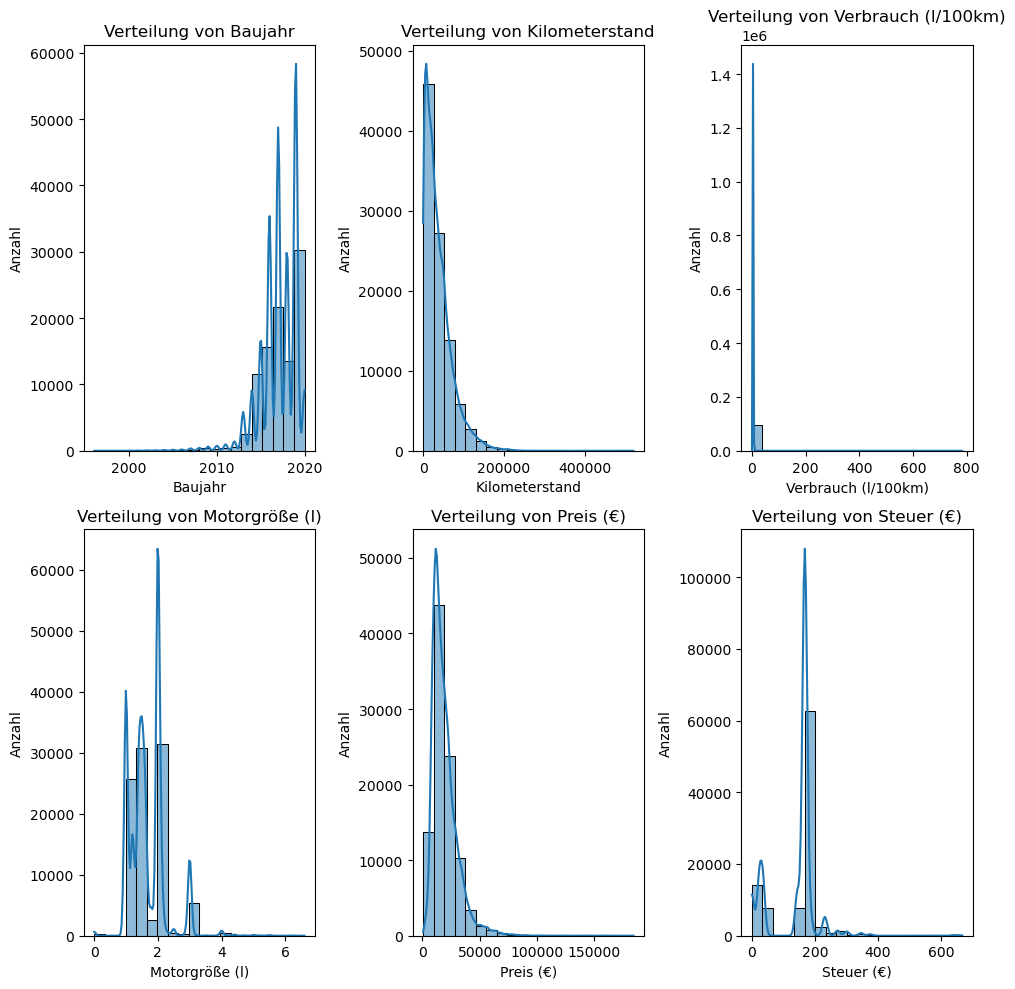

In [56]:
plt.figure(figsize=(10, 10))

numerical_columns = ['Baujahr', 'Kilometerstand', 'Verbrauch (l/100km)', 'Motorgröße (l)', 'Preis (€)', 'Steuer (€)']

# Erstellen von Subplots für jede numerische Variable
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Verteilung von {col}')
    plt.xlabel(col)
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()

Die Histogramme zeigen die Verteilung der einzelnen numerischen Merkmale:

- Baujahr: Die meisten Autos wurden zwischen 2016 und 2020 gebaut.

- Kilometerstand: Die Verteilung ist rechtsschief, wobei die meisten Autos einen niedrigen Kilometerstand haben.

- Verbrauch (l/100km): Die meisten Autos haben einen Verbrauch zwischen 3 und 6 Litern pro 100 Kilometer. 

- Motorgröße (l): Die meisten Autos haben eine Motorgröße zwischen 1 und 2 Litern.

- Preis (€): Die Verteilung des Preises ist rechtsschief, wobei die meisten Autos im niedrigeren Preissegment liegen.

- Steuer (€): Die Steuern variieren, wobei die meisten Autos Steuern im Bereich von 100 bis 200 € haben.

Nun betrachten wir noch die Verteilungen der kategorischen Merkmale: "Marke", "Getriebe" und "Kraftstoffart". 

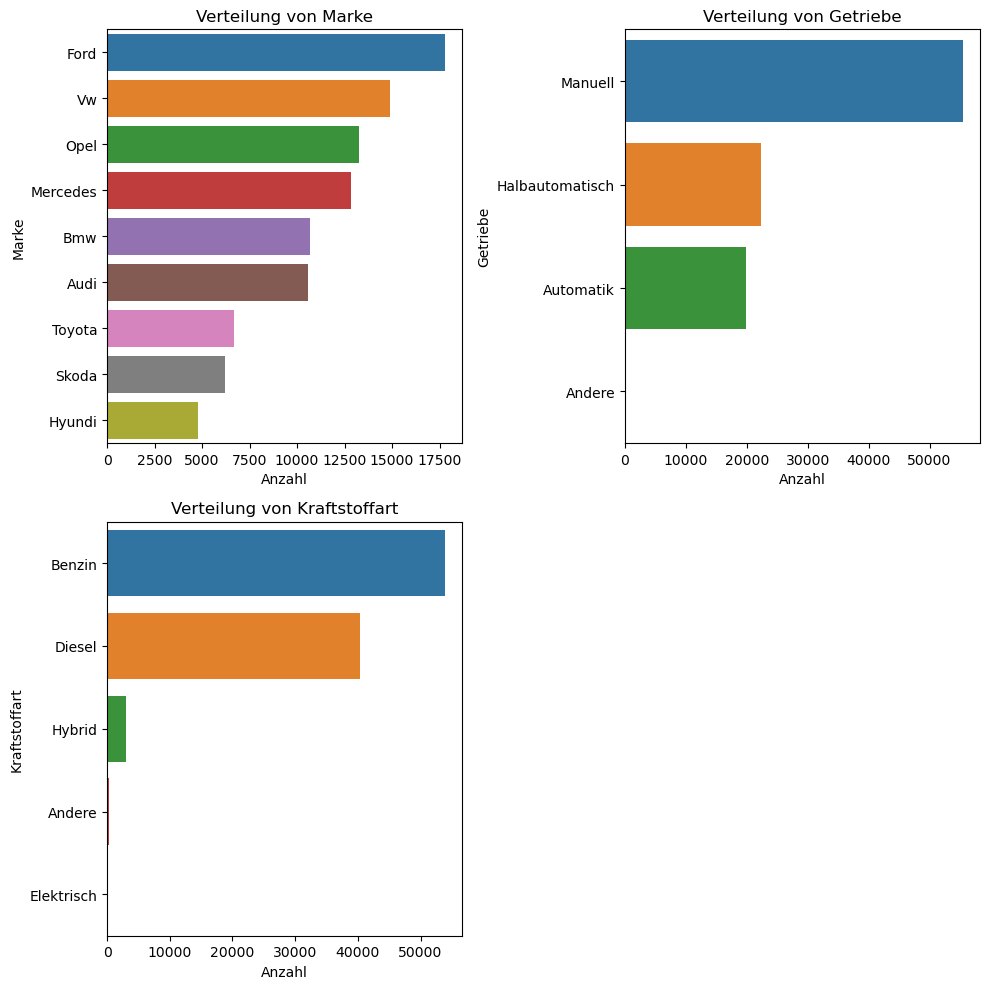

In [57]:
plt.figure(figsize=(10, 10))

categorical_columns = ['Marke', 'Getriebe', 'Kraftstoffart']

# Erstellen von Subplots für jede kategorische Variable
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Verteilung von {col}')
    plt.xlabel('Anzahl')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


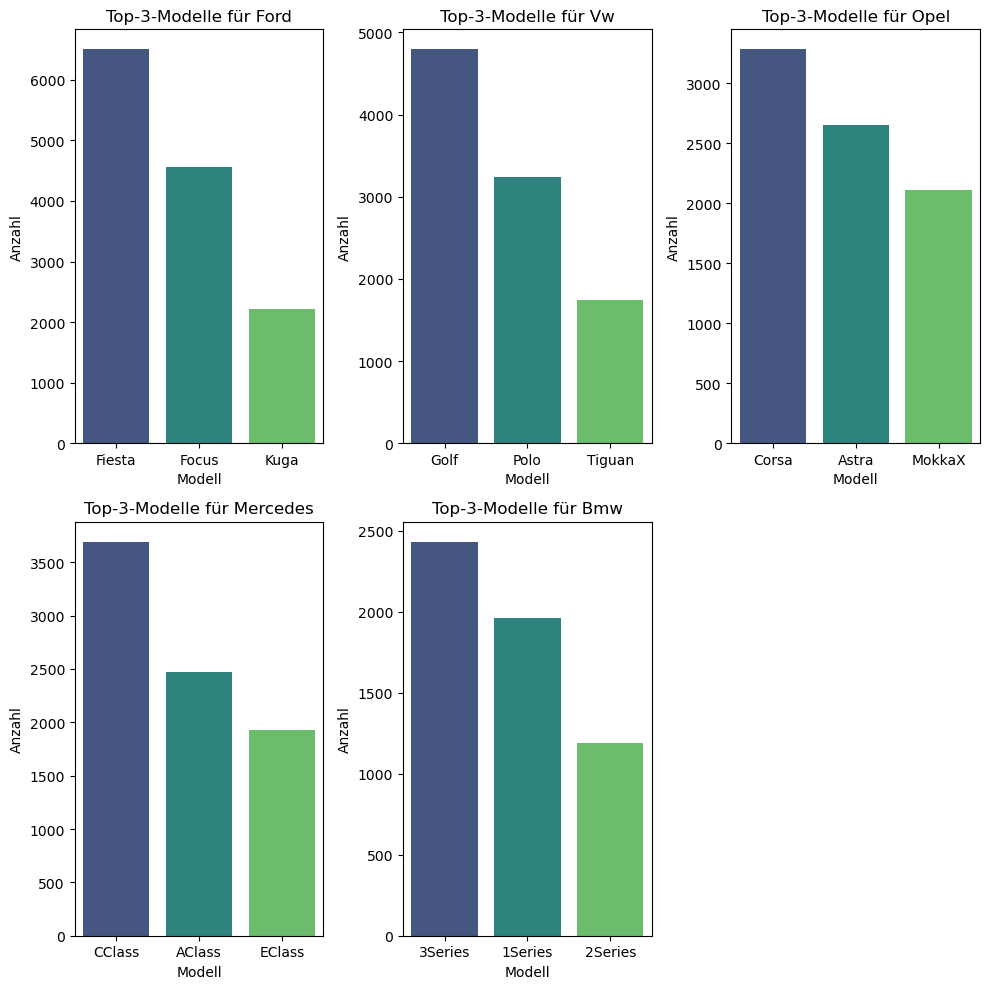

In [58]:
top_5_brands = df['Marke'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(10, 10))
for i, brand in enumerate(top_5_brands, 1):
    top_3_models = df[df['Marke'] == brand]['Modell'].value_counts().nlargest(3)
    plt.subplot(2, 3, i)
    sns.barplot(x=top_3_models.index, y=top_3_models.values, palette='viridis')
    plt.title(f'Top-3-Modelle für {brand}')
    plt.xlabel('Modell')
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()

#### <a id="Daten-bereinigen"></a>**2.2. Bivariate Analyse**

#### <a id="Daten-bereinigen"></a>**2.3. Multivariate Analyse**


#### <a id="Daten-bereinigen"></a>**2.4. Identifikation von Ausreißern**


#### <a id="Daten-bereinigen"></a>**2.5. Korrelationsanalyse**

### **Literaturverzeichnis**

[1] https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes (01.08.2023)

[2] Müller, A. C., & Guido, S. (2021). Introduction to Machine Learning with Python: A Guide for Data Scientists (2nd ed.). O'Reilly Media

[3] McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.

[4] OpenAI. (2023). Persönliche Kommunikation mit OpenAI's GPT-3.5 Modell. (01.08.2023)
 
[5] Peter Bruce, Andrew Bruce, Peter Gedeck. 'Praktische Statistik für Data Scientists: 50+ essenzielle Konzepte mit R und Python', 2021.